In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("../data/transformed_data.csv")

In [19]:
df.head(5)

,source_id,source_name,author_name,article_title,article_description,article_urlToImage,article_publishedAt,article_content,article_description_emotions,article_description_fake-real,...,article_title_spam-ham,article_title_sarcasm,article_title_fake_news,article_title_toxicity,article_title_offensive_detection,article_title_argument,article_title_irony,article_title_subjectivity-objectivity,article_title_intent,article_title_political_bias
0,No Information Available,Gizmodo.com,Matthew Gault,The Confusing and Extremely Online Politics of...,The nicotine pouches have been a conservative ...,https://gizmodo.com/app/uploads/2024/09/ZynPou...,2024-09-21 11:00:28+00:00,Tucker Carlson used to love Zyn nicotine pouch...,curiosity,Real,...,LABEL_0,LABEL_0,FAKE,toxic,Not offensive,NON-ARGUMENT,ironic,LABEL_1,billing and payment,LEFT
1,No Information Available,BBC News,Unknown,Is Reform UK's plan to get Farage into No 10 m...,The party is trying to professionalise to brea...,https://ichef.bbci.co.uk/news/1024/branded_new...,2024-09-23 00:14:19+00:00,Reform UK is convinced Nigel Farage can become...,neutral,Real,...,LABEL_0,LABEL_0,FAKE,toxic,Not offensive,NON-ARGUMENT,ironic,LABEL_1,delivery information,RIGHT
2,No Information Available,Yahoo Entertainment,Karissa Bell,Most US TikTok users aren’t following politica...,As TikTok faces the possibility of a ban in th...,No Information Available,2024-10-08 14:00:53+00:00,"If you click 'Accept all', we and our partners...",neutral,Real,...,LABEL_0,LABEL_0,TRUE,toxic,Not offensive,NON-ARGUMENT,not ironic,LABEL_0,edit account,RIGHT
3,No Information Available,BBC News,Unknown,Chris Mason: Alex Salmond was a man of consequ...,Our political editor writes that the late ex f...,https://ichef.bbci.co.uk/news/1024/branded_new...,2024-10-13 08:52:18+00:00,Alex Salmond was a man of consequence.\r\nWhen...,neutral,Real,...,LABEL_0,LABEL_0,FAKE,toxic,Not offensive,NON-ARGUMENT,ironic,LABEL_0,complaints and feedback,RIGHT
4,wired,Wired,Leah Feiger,Laura Loomer: The ‘Free Spirit’ Whispering in ...,Is Laura Loomer a mirror for Trump's worst ten...,https://media.wired.com/photos/66eb169720af82a...,2024-09-19 14:21:30+00:00,Leah Feiger: And it also just plays into the e...,curiosity,Real,...,LABEL_0,LABEL_0,FAKE,toxic,Not offensive,NON-ARGUMENT,ironic,LABEL_1,speak to person,LEFT


In [20]:
df.shape

(8700, 34)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 34 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   source_id                                      8700 non-null   object 
 1   source_name                                    8700 non-null   object 
 2   author_name                                    8700 non-null   object 
 3   article_title                                  8700 non-null   object 
 4   article_description                            8700 non-null   object 
 5   article_urlToImage                             8700 non-null   object 
 6   article_publishedAt                            8700 non-null   object 
 7   article_content                                8700 non-null   object 
 8   article_description_emotions                   8700 non-null   object 
 9   article_description_fake-real                  8700 

In [22]:
df.loc[df['author_name'] =='Unknown', 'source_name']

# Nearly 60+ sources in the list do not have an associated author name.

1        BBC News
3        BBC News
14       BBC News
15       BBC News
20       BBC News
          ...    
8619    [Removed]
8648    [Removed]
8658    [Removed]
8665     BBC News
8668    [Removed]
Name: source_name, Length: 977, dtype: object

In [23]:
df.columns

Index(['source_id', 'source_name', 'author_name', 'article_title',
       'article_description', 'article_urlToImage', 'article_publishedAt',
       'article_content', 'article_description_emotions',
       'article_description_fake-real', 'article_description_hate-no_hate',
       'article_description_spam-ham', 'article_description_sarcasm',
       'article_description_fake_news', 'article_description_toxicity',
       'article_description_offensive_detection',
       'article_description_argument', 'article_description_irony',
       'article_description_subjectivity-objectivity ',
       'article_description_intent', 'article_description_political_bias',
       'article_title_emotions', 'article_title_fake-real',
       'article_title_hate-no_hate', 'article_title_spam-ham',
       'article_title_sarcasm', 'article_title_fake_news',
       'article_title_toxicity', 'article_title_offensive_detection',
       'article_title_argument', 'article_title_irony',
       'article_title_sub

# Source Analysis

In [ ]:
# Frequency Analysis: Articles by Source and Author
source_counts = df['source_name'].value_counts()
author_counts = df['author_name'].value_counts()

# Plotting the top 10 sources by frequency
plt.figure(figsize=(10, 5))
source_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Sources by Article Frequency')
plt.xlabel('Source Name')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

# Plotting the top 10 authors by frequency
plt.figure(figsize=(10, 5))
author_counts.head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Authors by Article Frequency')
plt.xlabel('Author Name')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

# Bias Detection: Articles by Political Bias
bias_counts = df['article_title_political_bias'].value_counts()

# Plotting the political bias distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=bias_counts.index, y=bias_counts.values, palette="viridis")
plt.title('Distribution of Political Bias in Articles')
plt.xlabel('Political Bias')
plt.ylabel('Number of Articles')
plt.show()


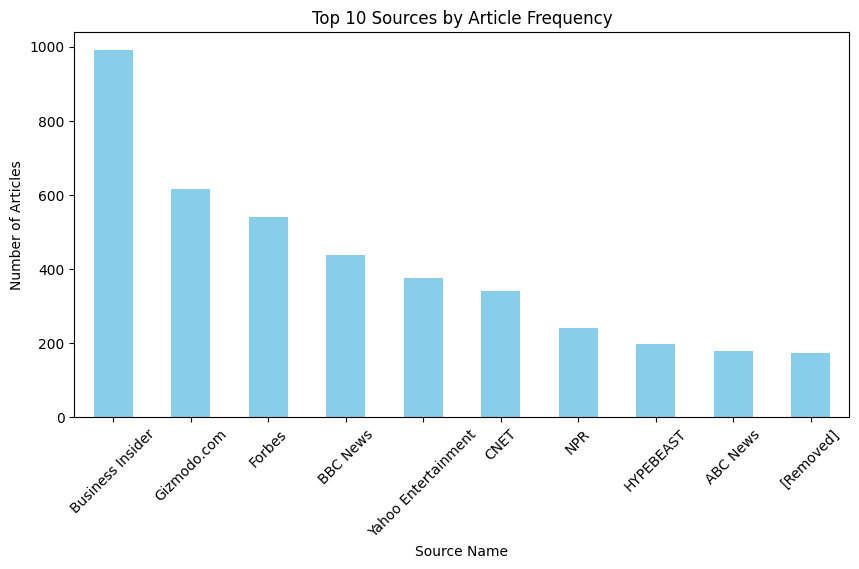

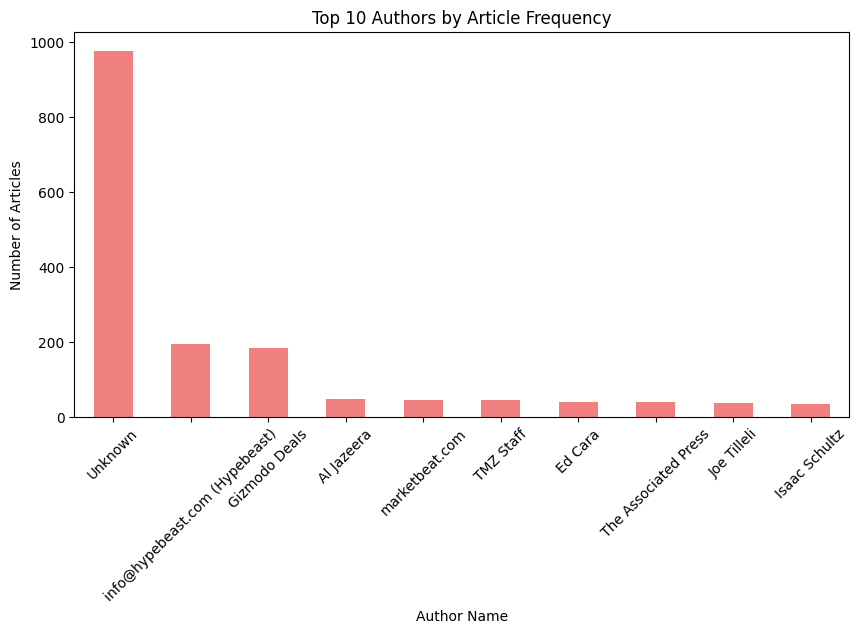

C:\Users\Poorn\AppData\Local\Temp\ipykernel_14956\2809515950.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bias_counts.index, y=bias_counts.values, palette="viridis")


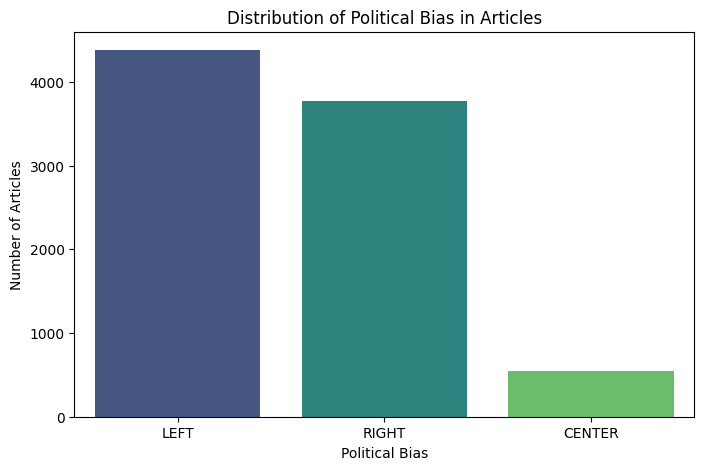

In [24]:
# Frequency Analysis: Articles by Source and Author
source_counts = df['source_name'].value_counts()
author_counts = df['author_name'].value_counts()

# Plotting the top 10 sources by frequency
plt.figure(figsize=(10, 5))
source_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Sources by Article Frequency')
plt.xlabel('Source Name')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

# Plotting the top 10 authors by frequency
plt.figure(figsize=(10, 5))
author_counts.head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Authors by Article Frequency')
plt.xlabel('Author Name')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

# Bias Detection: Articles by Political Bias
bias_counts = df['article_title_political_bias'].value_counts()

# Plotting the political bias distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=bias_counts.index, y=bias_counts.values, palette="viridis")
plt.title('Distribution of Political Bias in Articles')
plt.xlabel('Political Bias')
plt.ylabel('Number of Articles')
plt.show()


# Sentiment and Emotion Analysis:

C:\Users\Keertisuryawanshi\AppData\Local\Temp\ipykernel_62680\3755293909.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="coolwarm")


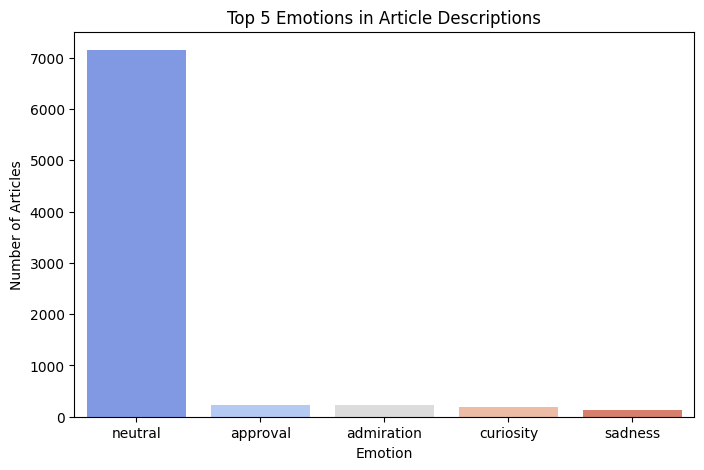

C:\Users\Keertisuryawanshi\AppData\Local\Temp\ipykernel_62680\3755293909.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subjectivity_counts.index, y=subjectivity_counts.values, palette="Set2")


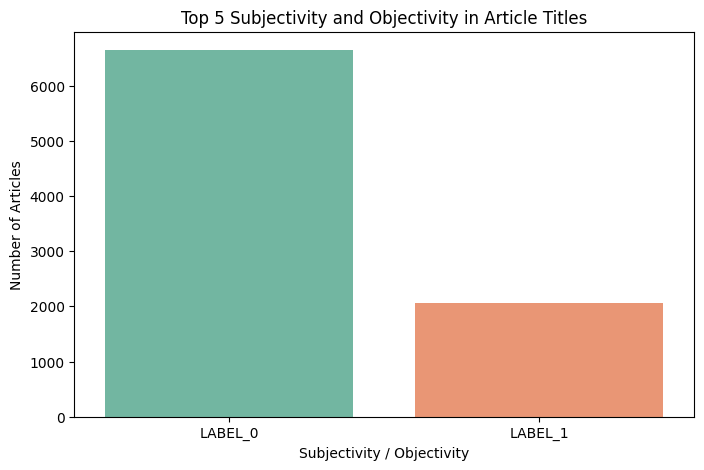

In [32]:
# Emotion Distribution Analysis
emotion_counts = df['article_description_emotions'].value_counts().head(5)

# Plotting the distribution of emotions within article descriptions
plt.figure(figsize=(8, 5))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="coolwarm")
plt.title('Top 5 Emotions in Article Descriptions')
plt.xlabel('Emotion')
plt.ylabel('Number of Articles')
plt.show()

# Subjectivity and Objectivity Analysis
subjectivity_counts = df['article_title_subjectivity-objectivity '].value_counts().head(5)

# Plotting the subjectivity vs objectivity distribution in article titles
plt.figure(figsize=(8, 5))
sns.barplot(x=subjectivity_counts.index, y=subjectivity_counts.values, palette="Set2")
plt.title('Top 5 Subjectivity and Objectivity in Article Titles')
plt.xlabel('Subjectivity / Objectivity')
plt.ylabel('Number of Articles')
plt.show()


In [ ]:
df = pd.read_csv(r'C:\Users\Keertisuryawanshi\data-management-2\src\datamanagement\data\transformed_data.csv')
pd.reset_option('display.max_columns', 100)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')

Graph 1: The dataset is heavily neutral and objective in tone, with minimal focus on emotional engagement.
A small number of articles contain positive emotions (e.g., approval, admiration) or curiosity, indicating occasional engagement-focused content, but this is rare compared to the neutral tone.

# Content Quality and Reliability

C:\Users\Keertisuryawanshi\AppData\Local\Temp\ipykernel_62680\672104196.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spam_counts.index, y=spam_counts.values, palette="Blues")


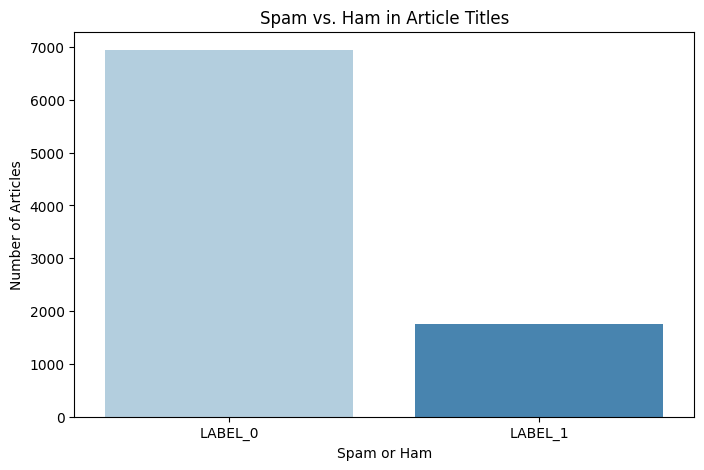

C:\Users\Keertisuryawanshi\AppData\Local\Temp\ipykernel_62680\672104196.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fake_news_counts.index, y=fake_news_counts.values, palette="Reds")


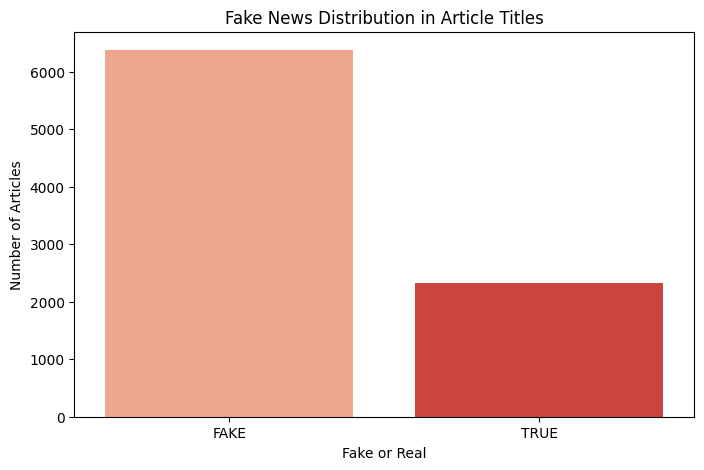

C:\Users\Keertisuryawanshi\AppData\Local\Temp\ipykernel_62680\672104196.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sarcasm_counts.index, y=sarcasm_counts.values, palette="Purples")


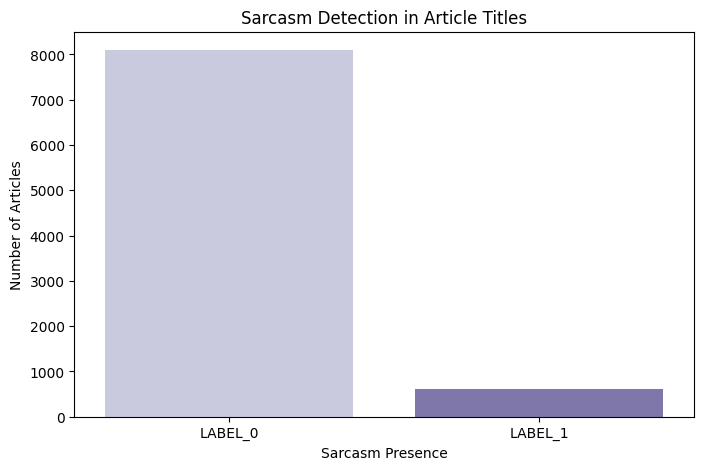

C:\Users\Keertisuryawanshi\AppData\Local\Temp\ipykernel_62680\672104196.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=toxicity_counts.index, y=toxicity_counts.values, palette="Oranges")


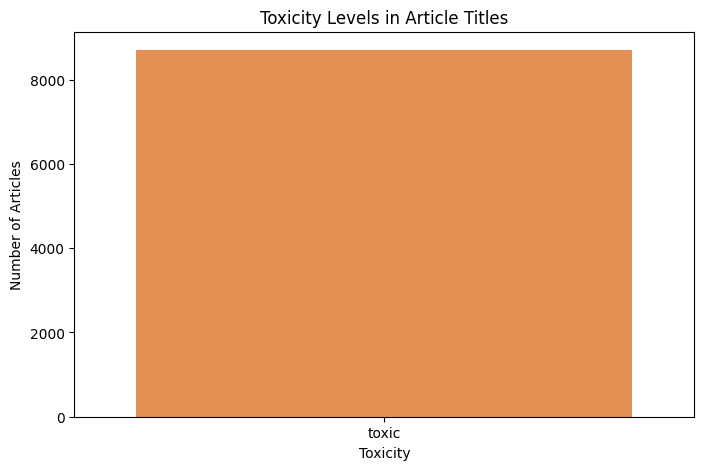

C:\Users\Keertisuryawanshi\AppData\Local\Temp\ipykernel_62680\672104196.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=offensive_counts.index, y=offensive_counts.values, palette="Greens")


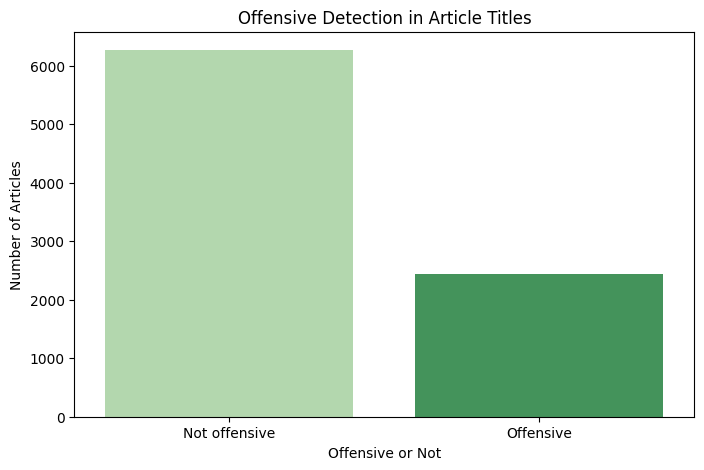

In [33]:
# Spam, Fake News, and Sarcasm Analysis
spam_counts = df['article_title_spam-ham'].value_counts()
fake_news_counts = df['article_title_fake_news'].value_counts()
sarcasm_counts = df['article_title_sarcasm'].value_counts()

# Plotting Spam vs. Ham in Article Titles
plt.figure(figsize=(8, 5))
sns.barplot(x=spam_counts.index, y=spam_counts.values, palette="Blues")
plt.title('Spam vs. Ham in Article Titles')
plt.xlabel('Spam or Ham')
plt.ylabel('Number of Articles')
plt.show()

# Plotting Fake News Distribution in Article Titles
plt.figure(figsize=(8, 5))
sns.barplot(x=fake_news_counts.index, y=fake_news_counts.values, palette="Reds")
plt.title('Fake News Distribution in Article Titles')
plt.xlabel('Fake or Real')
plt.ylabel('Number of Articles')
plt.show()

# Plotting Sarcasm Detection in Article Titles
plt.figure(figsize=(8, 5))
sns.barplot(x=sarcasm_counts.index, y=sarcasm_counts.values, palette="Purples")
plt.title('Sarcasm Detection in Article Titles')
plt.xlabel('Sarcasm Presence')
plt.ylabel('Number of Articles')
plt.show()

# Offensiveness and Toxicity Analysis
toxicity_counts = df['article_title_toxicity'].value_counts()
offensive_counts = df['article_title_offensive_detection'].value_counts()

# Plotting Toxicity Levels in Article Titles
plt.figure(figsize=(8, 5))
sns.barplot(x=toxicity_counts.index, y=toxicity_counts.values, palette="Oranges")
plt.title('Toxicity Levels in Article Titles')
plt.xlabel('Toxicity')
plt.ylabel('Number of Articles')
plt.show()

# Plotting Offensive Detection in Article Titles
plt.figure(figsize=(8, 5))
sns.barplot(x=offensive_counts.index, y=offensive_counts.values, palette="Greens")
plt.title('Offensive Detection in Article Titles')
plt.xlabel('Offensive or Not')
plt.ylabel('Number of Articles')
plt.show()


# Intent and Argument Analysis:

### Intent Categories:

Insight: Different intent categories (e.g., complaints, informational) reflect the purpose of articles. An information-heavy dataset suggests an educational or factual focus, while a mix of intents may indicate diverse coverage, including opinion and feedback-based content.

C:\Users\Keertisuryawanshi\AppData\Local\Temp\ipykernel_62680\454414197.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=intent_counts.index, y=intent_counts.values, palette="pastel")


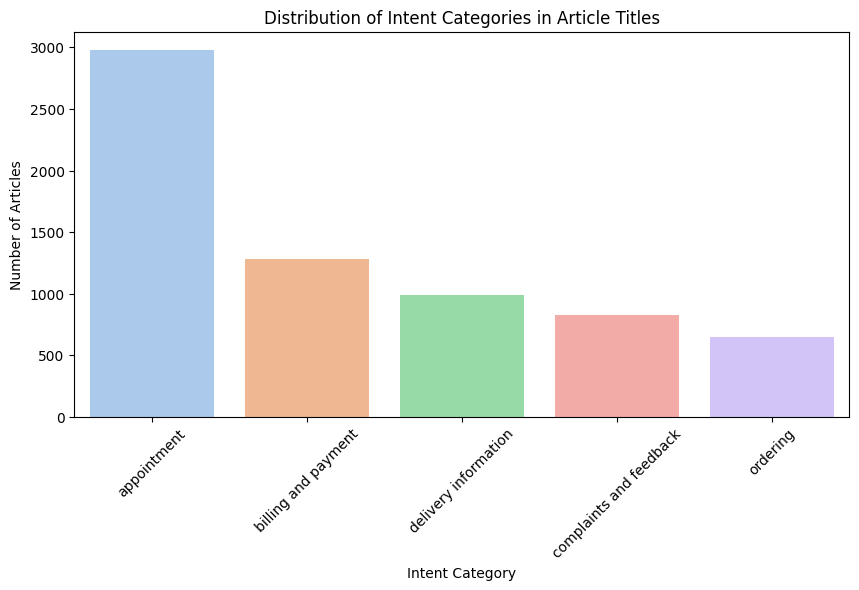

In [34]:
# Intent Category Analysis
intent_counts = df['article_title_intent'].value_counts().head(5)

# Plotting the distribution of intent categories
plt.figure(figsize=(10, 5))
sns.barplot(x=intent_counts.index, y=intent_counts.values, palette="pastel")
plt.title('Distribution of Intent Categories in Article Titles')
plt.xlabel('Intent Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()



 The dataset appears heavily focused on providing practical, neutral, and service-related information, as evidenced by the prevalent intent categories and the high level of non-argumentative content.

### Argument Presence:

Insight: High levels of argumentative content suggest assertive or opinionated articles, while non-argumentative content might indicate a more neutral or reporting-oriented approach. This balance impacts the perceived assertiveness or neutrality of the dataset.

C:\Users\Keertisuryawanshi\AppData\Local\Temp\ipykernel_62680\867711299.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=argument_counts.index, y=argument_counts.values, palette="coolwarm")


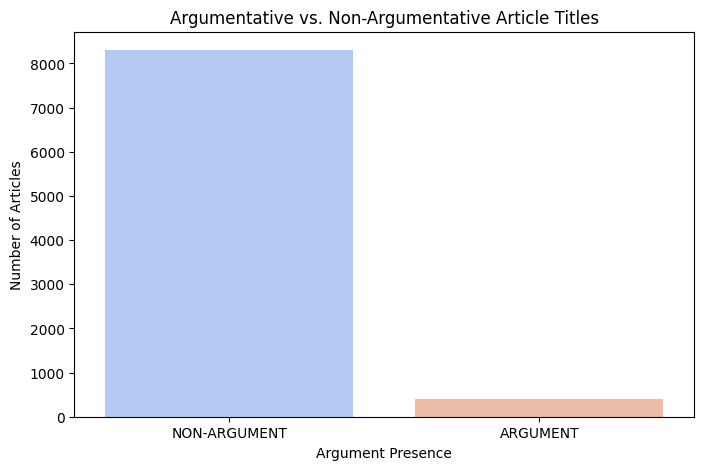

In [35]:

# Argument Presence Analysis

argument_counts = df['article_title_argument'].value_counts().head(5)

# Plotting the presence of arguments in article titles
plt.figure(figsize=(8, 5))
sns.barplot(x=argument_counts.index, y=argument_counts.values, palette="coolwarm")
plt.title('Argumentative vs. Non-Argumentative Article Titles')
plt.xlabel('Argument Presence')
plt.ylabel('Number of Articles')
plt.show()

Insights: The graph shows that the majority of articles are non-argumentative, with very few being argumentative. This suggests that most of the articles in this dataset are not trying to persuade or express strong opinions. Instead, they are likely focused on providing clear, unbiased information or guidance.


#Just For the Info 

Argumentative articles tend to introduce bias because they represent a specific perspective or attempt to influence the reader’s opinion. Since the dataset has very few argumentative articles, this indicates that it is mostly free from strong opinions or biases.
The predominance of non-argumentative content implies that the dataset is likely focused on helping readers with practical information without promoting any specific viewpoints or ideologies. This contributes to a neutral tone in the content.

# Sentiment and Emotion by Source or Bias:

Cross-analyze sentiment or emotions with source and bias to see if certain sources or biases correlate with particular emotional tones. For instance, do left-leaning articles show more curiosity or excitement, while right-leaning articles show more disapproval?


## 5 political biases and top 5 emotions

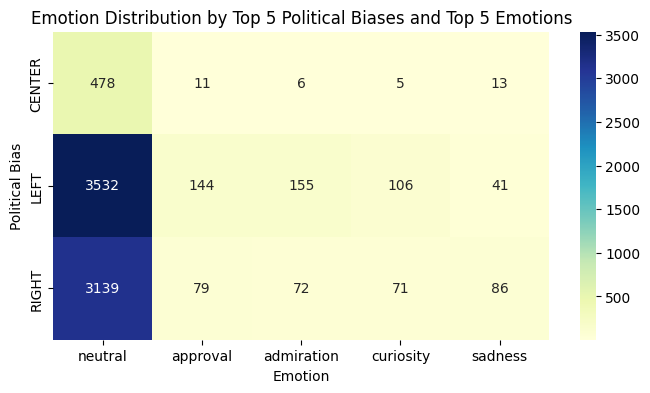

In [36]:
# Selecting the top 5 emotions based on their overall frequency in the dataset
top_emotions = df['article_description_emotions'].value_counts().index[:5]

# Grouping by political bias and emotions to get the counts of each combination
bias_emotion_counts = df.groupby(['article_title_political_bias', 'article_description_emotions']).size().unstack(fill_value=0)

# Filtering the bias-emotion data to include only the top 5 emotions
bias_emotion_counts_top5 = bias_emotion_counts[top_emotions]

# Plotting heatmap for top 5 political biases and top 5 emotions
plt.figure(figsize=(8, 4))
sns.heatmap(bias_emotion_counts_top5, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Emotion Distribution by Top 5 Political Biases and Top 5 Emotions')
plt.xlabel('Emotion')
plt.ylabel('Political Bias')
plt.show()


Emotion by Bias: Although there is a prevalence of neutrality across biases, LEFT-leaning articles tend to display more emotional diversity, potentially aiming for more reader engagement or opinionated perspectives.

## 5 sources and top 5 emotions

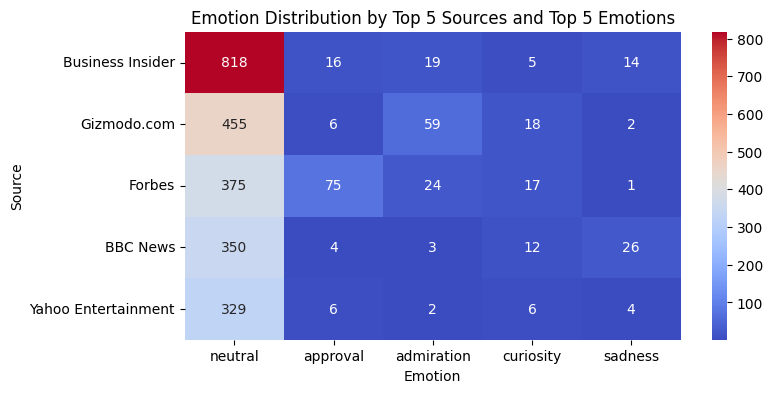

In [37]:
# Selecting the top 5 emotions based on their overall frequency in the dataset
top_emotions = df['article_description_emotions'].value_counts().index[:5]

# Grouping by source and emotions to get the counts of each combination
source_emotion_counts = df.groupby(['source_name', 'article_description_emotions']).size().unstack(fill_value=0)

# Selecting top 5 sources based on the total count of articles
top_sources = source_emotion_counts.sum(axis=1).nlargest(5).index

# Filtering the data to include only the top 5 sources and top 5 emotions
source_emotion_counts_top5 = source_emotion_counts.loc[top_sources, top_emotions]

# Plotting heatmap for top 5 sources and top 5 emotions
plt.figure(figsize=(8, 4))
sns.heatmap(source_emotion_counts_top5, annot=True, fmt="d", cmap="coolwarm")
plt.title('Emotion Distribution by Top 5 Sources and Top 5 Emotions')
plt.xlabel('Emotion')
plt.ylabel('Source')
plt.show()



Emotion by Source: Sources like Business Insider and Gizmodo.com show characteristic emotional tones aligned with their content focus, with Business Insider leaning towards neutral/objective and Gizmodo.com promoting curiosity-driven content. Forbes, on the other hand, showcases admiration and approval, possibly due to its focus on business success.

## Political bias (LEFT, RIGHT, CENTER) across the top 10 sources

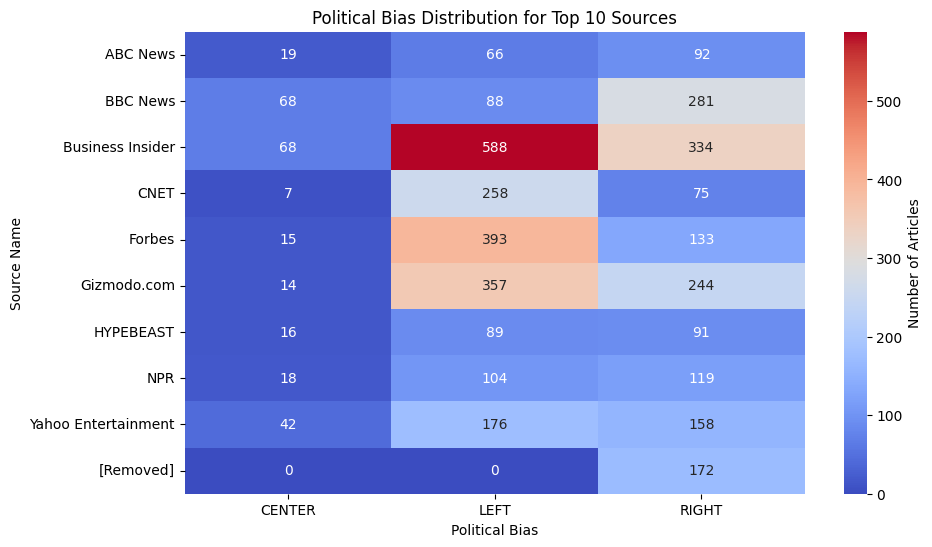

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the top 10 sources based on their overall frequency in the dataset
top_sources = df['source_name'].value_counts().index[:10]

# Filtering data to include only the articles from the top 10 sources
filtered_data = df[df['source_name'].isin(top_sources)]

# Creating a pivot table to get the count of articles by source and political bias
source_bias_counts = filtered_data.pivot_table(index='source_name', columns='article_title_political_bias', aggfunc='size', fill_value=0)

# Plotting heatmap to show distribution of political bias (LEFT, RIGHT, CENTER) across top 10 sources
plt.figure(figsize=(10, 6))
sns.heatmap(source_bias_counts, annot=True, fmt="d", cmap="coolwarm", cbar_kws={'label': 'Number of Articles'})
plt.title('Political Bias Distribution for Top 10 Sources')
plt.xlabel('Political Bias')
plt.ylabel('Source Name')
plt.show()


Strong LEFT-Leaning Sources: Business Insider, BBC News, and Gizmodo.com have a higher count of LEFT-leaning articles, indicating a slight liberal bias.

RIGHT-Leaning Sources: CNET and Yahoo Entertainment are more RIGHT-leaning, providing conservative content, which adds some balance to the dataset.

Balanced Sources: ABC News and NPR show a more balanced distribution across LEFT, RIGHT, and CENTER biases, suggesting neutrality.

Overall: The dataset leans slightly LEFT overall but includes a range of perspectives, with significant contributions from RIGHT-leaning sources as well. This mix provides a diverse political representation.

# Publication Time Trends

In [39]:
!pip install seaborn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Keertisuryawanshi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


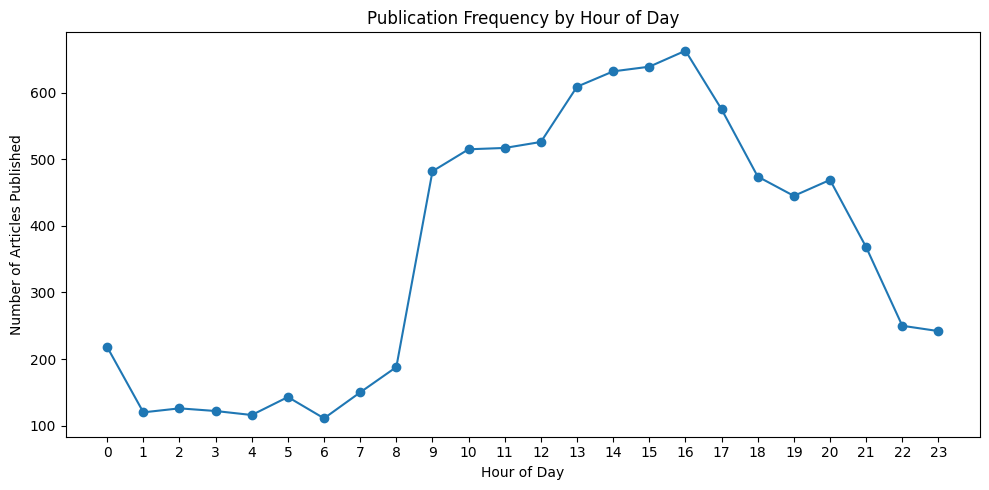

In [40]:
import seaborn as sns

# Convert 'article_publishedAt' to datetime format
df['article_publishedAt'] = pd.to_datetime(df['article_publishedAt'], errors='coerce')

# Drop any rows with NaT in 'article_publishedAt' after conversion
df = df.dropna(subset=['article_publishedAt'])

# Extract publication date and hour for analysis
df['publication_date'] = df['article_publishedAt'].dt.date
df['publication_hour'] = df['article_publishedAt'].dt.hour


# Plotting Publication Frequency by Hour of Day
publication_hour_counts = df['publication_hour'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(publication_hour_counts.index, publication_hour_counts.values, marker='o', linestyle='-')
plt.title('Publication Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles Published')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

Midday Publishing Focus: Content is strategically published around midday to early afternoon, likely to align with peak engagement times.

Preparation in Morning: Content preparation seems to ramp up from the early morning to hit the midday peak.

Evening and Late Night Reduction: Lower publication frequency in the evening and night aligns with reduced audience activity during these hours.